In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Importing the dataset

In [3]:
fast_food_df = pd.read_csv('Data\WA_Marketing-Campaign.csv')

# EDA

Let's view the dataset.

In [4]:
fast_food_df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
fast_food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


No missing values.

In [6]:
fast_food_df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


LocationID has only 548 values, but the maximum is 920 and the minimum is 1. We'll look into that. Other than this, there are no feature statistics that stand out as unusual.

In [38]:
colors = ["#e60049", "#0bb4ff", "#50e991"]

## Promotion Distribution

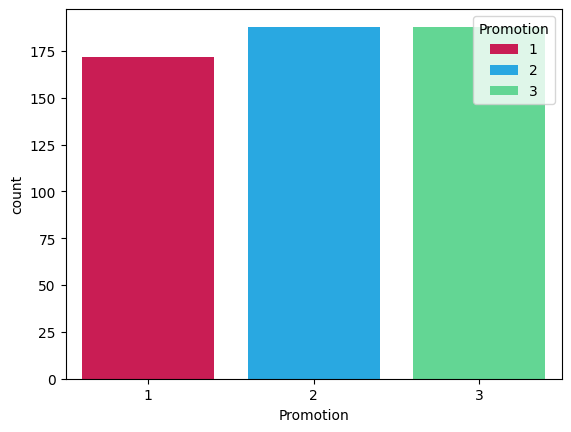

In [70]:
sns.countplot(x='Promotion', data=fast_food_df, hue='Promotion', palette=colors)
plt.show()

The test group counts are similar.

## Promotion vs SalesInThousands

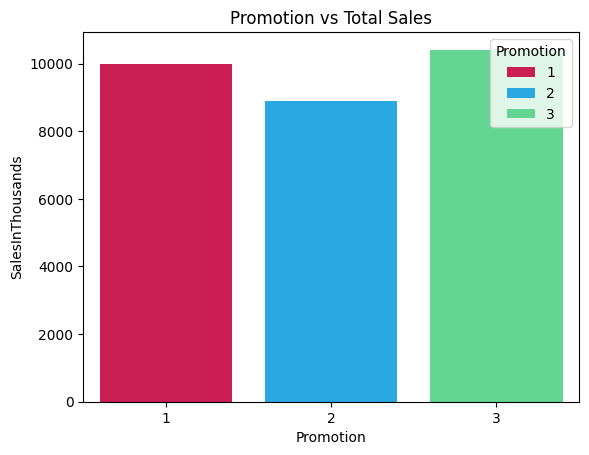

In [97]:
sales_sum = fast_food_df.groupby('Promotion')['SalesInThousands'].sum().reset_index()
sns.barplot(x='Promotion', y='SalesInThousands', data=sales_sum, hue='Promotion', palette=colors)
plt.title('Promotion vs Total Sales')
plt.show()

Promotion 3 has the highest total sales, followed by Promotion 1, and Promotion 2.

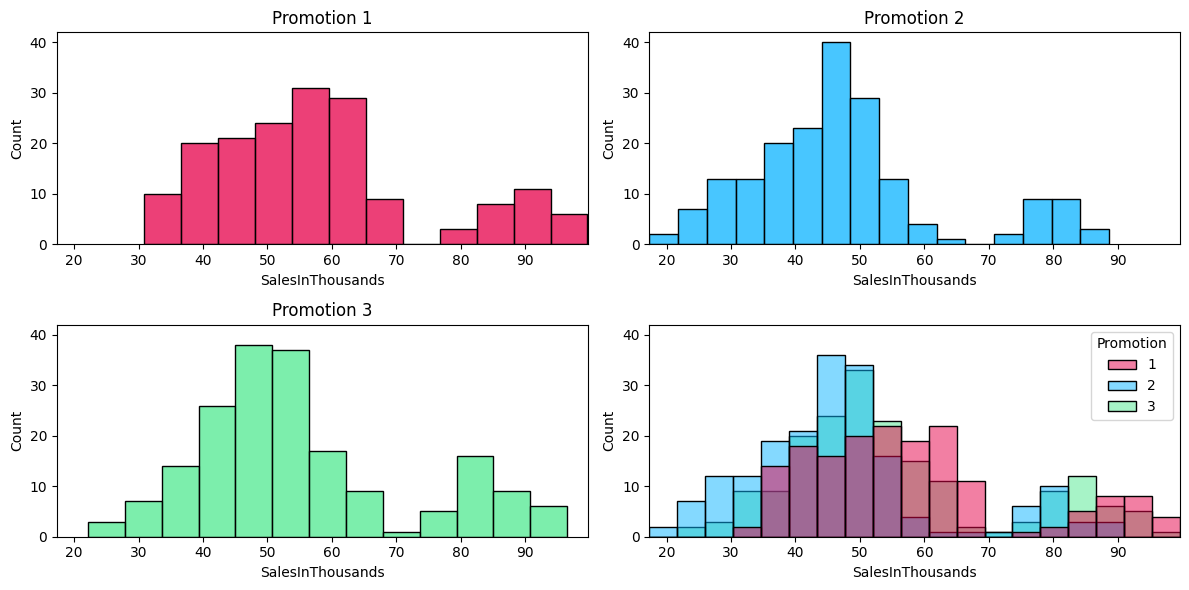

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

axes = axes.flatten()
for i in range(1, 4):
    sns.histplot(x='SalesInThousands', data=fast_food_df.loc[fast_food_df['Promotion'] == i], color=colors[i-1], ax=axes[i-1])
    axes[i-1].set_title(f'Promotion {i}')


sns.histplot(x='SalesInThousands', data=fast_food_df, hue='Promotion', palette=["#e60049", "#0bb4ff", "#50e991"], ax=axes[3])

x_min, x_max = fast_food_df['SalesInThousands'].min(), fast_food_df['SalesInThousands'].max()
y_min, y_max = 0, max(ax.get_ylim()[1] for ax in axes)

for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

*    Promotion 2 has more sales that are less than 50 compared to Promotion 1 and Promotion 3.
*    Promotion 1 has slightly more sales than Promotion 2 and 3 for sales between 55 ~ 70 or higher than 85.

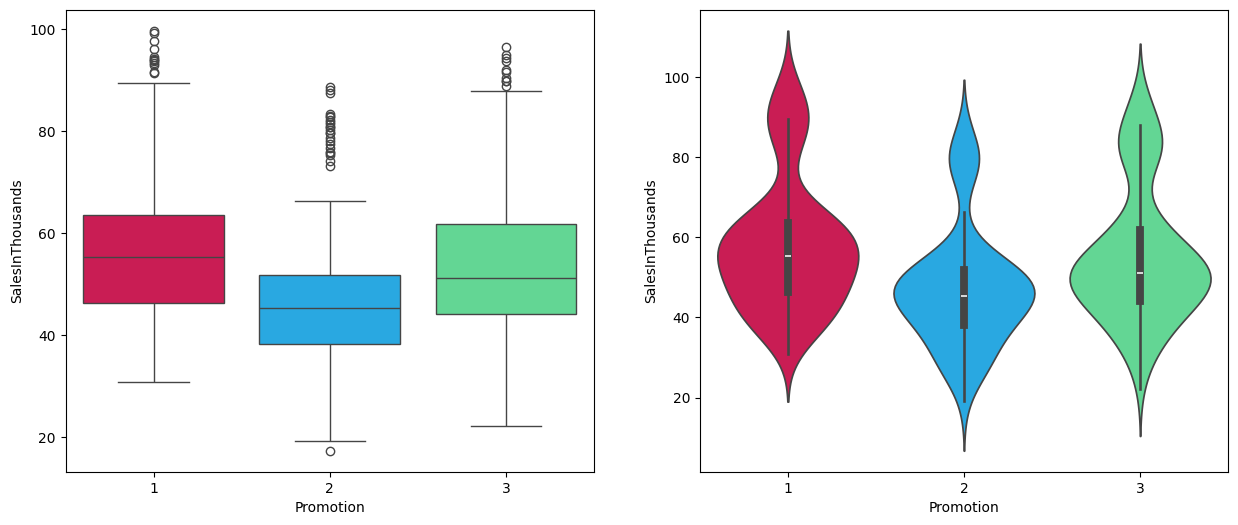

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes = axes.flatten()

sns.boxplot(x='Promotion', y='SalesInThousands', data=fast_food_df, hue='Promotion', palette=colors, ax=axes[0])
sns.violinplot(x='Promotion', y='SalesInThousands', data=fast_food_df, hue='Promotion', palette=colors, ax=axes[1])
for ax in axes:
    ax.legend([],[], frameon=False)
plt.show()

* Promotion 1 has a slightly higher median than Promotion 3, and Promotion 2 has the lowest median.
* Promotion 2 has a smaller IQR than Promotion 1 and 3.
* The area of highest concentration of sales for Promotion 1 is greater than the highest concentrations for Promotions 2 and 3.
* No outliers that standout.

## Promotion vs AgeOfStore

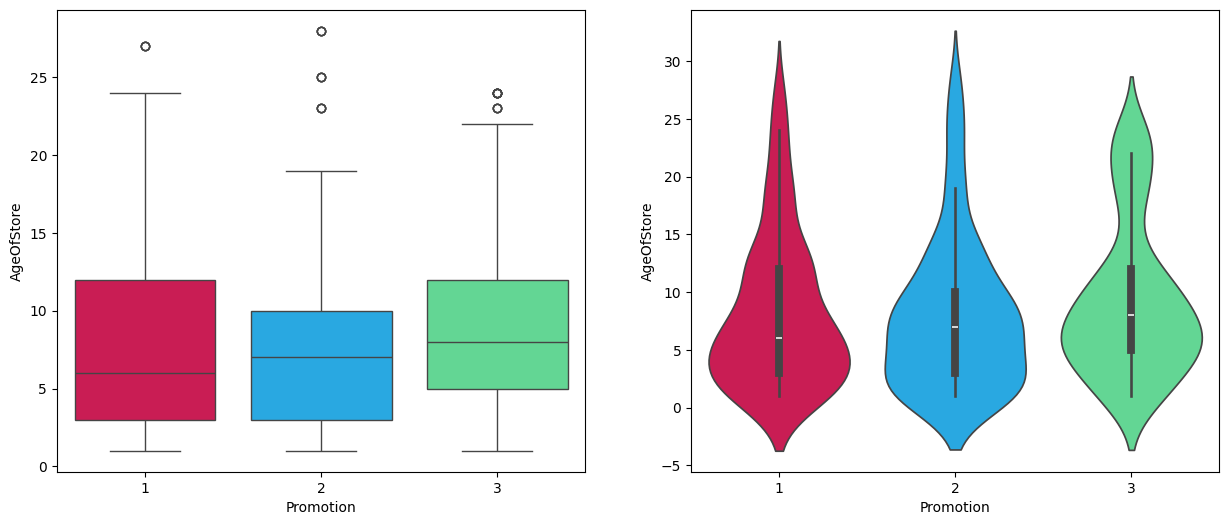

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes = axes.flatten()

sns.boxplot(x='Promotion', y='AgeOfStore', data=fast_food_df, hue='Promotion', palette=colors, ax=axes[0])
sns.violinplot(x='Promotion', y='AgeOfStore', data=fast_food_df, hue='Promotion', palette=colors, ax=axes[1])
for ax in axes:
    ax.legend([],[], frameon=False)
plt.show()

*    The distribution of AgeOfStore for Promotion 1 and 3 are similar.
*    Promotion 2 has a slithglty smaller IQR and a lower Q3 compared to Promotion 1 and 3.

## Week vs SalesInThousands

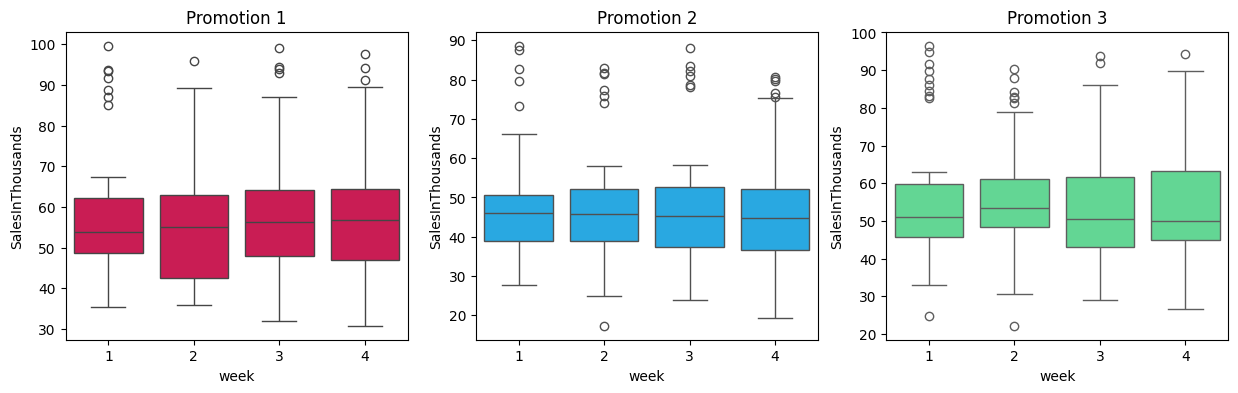

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes = axes.flatten()

for i in range(1, 4):
    sns.boxplot(x='week', y='SalesInThousands', data=fast_food_df.loc[fast_food_df['Promotion'] == i], color=colors[i-1], ax=axes[i-1])
    axes[i-1].set_title(f'Promotion {i}')

for ax in axes:
    ax.legend([],[], frameon=False)
plt.show()

*   Promotion 1 and 3 have higher third quartile (Q3) for weeks 2, 3, and 4, indicating there were more larger purchases during those weeks.
*   Promotion 2 week 1 and 4 have higher third quartile (Q3) compared to week 2, and 3.

## MarketSize vs SalesInThousands

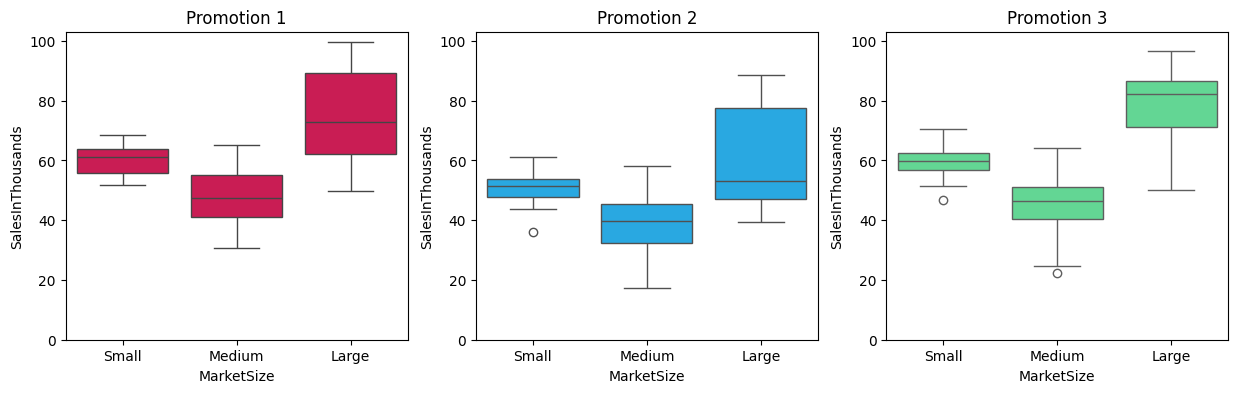

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes = axes.flatten()

for i in range(1, 4):
    sns.boxplot(x='MarketSize', y='SalesInThousands', data=fast_food_df.loc[fast_food_df['Promotion'] == i], color=colors[i-1], ax=axes[i-1], order=['Small', 'Medium', 'Large'])
    axes[i-1].set_title(f'Promotion {i}')

y_min, y_max = 0, max(ax.get_ylim()[1] for ax in axes)
    
for ax in axes:
    ax.legend([],[], frameon=False)
    ax.set_ylim(y_min, y_max)
plt.show()

*    The pattern of sales for the size of the market is the same throught the promotions.
*    As we saw in the previous plots Promotion 1 and 3 have higher means of sales.
*   Promotion 2 has the lowes Q3 for all market sizes of the promotions.

## MarketId vs SalesInThousands

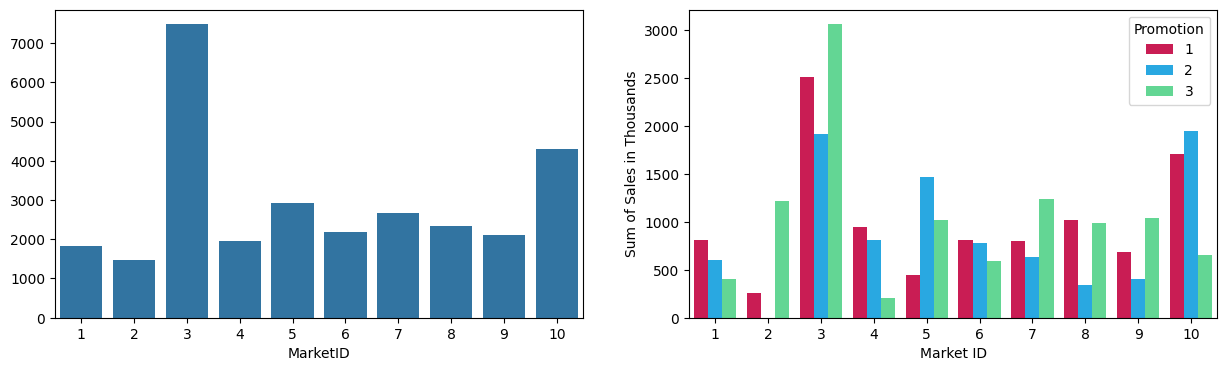

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes = axes.flatten()

sum_sales = fast_food_df.groupby('MarketID')['SalesInThousands'].sum()
sns.barplot(x=sum_sales.index, y=sum_sales.values, ax=axes[0])
plt.ylabel('Sum of Sales in Thousands')

sum_sales = fast_food_df.groupby(['MarketID', 'Promotion'])['SalesInThousands'].sum().reset_index()
sns.barplot(x='MarketID', y='SalesInThousands', hue='Promotion', palette=colors, data=sum_sales, ax=axes[1])
plt.xlabel('Market ID')
plt.ylabel('Sum of Sales in Thousands')
plt.show()

*    MarketID 3 has the highest sum of sales.
*    The sales of the different promotions are not equal.